In [1]:
import os
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import numpy as np
from matplotlib import pyplot as plt

In [2]:
os.chdir('/Users/jesse/OneDrive/Documents/thesis')


# INPUT RTTOV

In [3]:
!ncdump -h test-2.nc

netcdf test-2 {
dimensions:
	hydro = 9 ;
	level = 150 ;
	lat = 91 ;
	lon = 59 ;
	bnds = 2 ;
variables:
	float Reff(hydro, level, lat, lon) ;
	float T_abs(level, lat, lon) ;
	float cca(level, lat, lon) ;
	float dem_c(level, lat, lon) ;
	float dem_s(level, lat, lon) ;
	float dtau_c(level, lat, lon) ;
	float dtau_s(level, lat, lon) ;
	float emsfc_lw ;
	float fl_ccrain(level, lat, lon) ;
	float fl_ccsnow(level, lat, lon) ;
	float fl_lsgrpl(level, lat, lon) ;
	float fl_lsrain(level, lat, lon) ;
	float fl_lssnow(level, lat, lon) ;
	float height(level, lat, lon) ;
	float height_half(level, lat, lon) ;
	float iwp(lat, lon) ;
		iwp:units = "kg.m-2" ;
	float landmask(lat, lon) ;
	double lat(lat) ;
		lat:long_name = "lat" ;
	float lat_bnds(lat, bnds) ;
	double lon(lon) ;
		lon:long_name = "lon" ;
	float lon_bnds(lon, bnds) ;
	float lwp(lat, lon) ;
		lwp:units = "kg.m-2" ;
	float mr_ccice(level, lat, lon) ;
	float mr_ccliq(level, lat, lon) ;
	float mr_lsice(level, lat, lon) ;
	float mr_lsliq(level

In [4]:
import xarray as xr

In [5]:
ds = xr.open_dataset('test.nc')

In [6]:
import netCDF4 #https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/
import numpy as np


In [7]:
f = netCDF4.Dataset('test.nc')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): bnds(2), lat(637), lon(589), level(150), hydro(9)
    variables(dimensions): float64 lat(lat), float32 lat_bnds(lat, bnds), float64 lon(lon), float32 lon_bnds(lon, bnds), float32 height(level, lat, lon), float32 pfull(level, lat, lon), float32 phalf(level, lat, lon), float32 T_abs(level, lat, lon), float32 qv(level, lat, lon), float32 rh(level, lat, lon), float32 tca(level, lat, lon), float32 cca(level, lat, lon), float32 mr_lsliq(level, lat, lon), float32 mr_lsice(level, lat, lon), float32 mr_ccliq(level, lat, lon), float32 mr_ccice(level, lat, lon), float32 fl_lsrain(level, lat, lon), float32 fl_lssnow(level, lat, lon), float32 fl_lsgrpl(level, lat, lon), float32 fl_ccrain(level, lat, lon), float32 fl_ccsnow(level, lat, lon), float32 orography(lat, lon), float32 landmask(lat, lon), float32 height_half(level, lat, lon), float32 psfc(lat, lon), float32 Reff(hydro, level, lat, lo

In [8]:
print(f.variables.keys()) # get all variable names


dict_keys(['lat', 'lat_bnds', 'lon', 'lon_bnds', 'height', 'pfull', 'phalf', 'T_abs', 'qv', 'rh', 'tca', 'cca', 'mr_lsliq', 'mr_lsice', 'mr_ccliq', 'mr_ccice', 'fl_lsrain', 'fl_lssnow', 'fl_lsgrpl', 'fl_ccrain', 'fl_ccsnow', 'orography', 'landmask', 'height_half', 'psfc', 'Reff', 'dtau_s', 'dtau_c', 'dem_s', 'dem_c', 'skt', 'sunlit', 'emsfc_lw', 'mr_ozone', 'u_wind', 'v_wind', 'lwp', 'iwp'])


In [9]:
temp = f.variables['T_abs'] # temperature variable
print(temp)
print(temp.dimensions)
print(temp.shape)


<class 'netCDF4._netCDF4.Variable'>
float32 T_abs(level, lat, lon)
unlimited dimensions: 
current shape = (150, 637, 589)
filling on, default _FillValue of 9.969209968386869e+36 used
('level', 'lat', 'lon')
(150, 637, 589)


In [44]:
for d in f.dimensions.items():
  print(d)

('bnds', <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2)
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 637)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 589)
('level', <class 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 150)
('hydro', <class 'netCDF4._netCDF4.Dimension'>: name = 'hydro', size = 9)


In [45]:
latitud,longitud = f.variables['lat'], f.variables['lon']
print(latitud)
print(longitud)

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    long_name: lat
unlimited dimensions: 
current shape = (637,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    long_name: lon
unlimited dimensions: 
current shape = (589,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [46]:
latitud

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    long_name: lat
unlimited dimensions: 
current shape = (637,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [47]:
f.variables['qv']

<class 'netCDF4._netCDF4.Variable'>
float32 qv(level, lat, lon)
unlimited dimensions: 
current shape = (150, 637, 589)
filling on, default _FillValue of 9.969209968386869e+36 used

In [48]:
qv_values = f.variables['qv'][:]
#print(qv_values)
print(qv_values.shape)

(150, 637, 589)


In [49]:
lwp_values = f.variables['lwp'][:]
print(f.variables['lwp'])

<class 'netCDF4._netCDF4.Variable'>
float32 lwp(lat, lon)
    units: kg.m-2
unlimited dimensions: 
current shape = (637, 589)
filling on, default _FillValue of 9.969209968386869e+36 used


In [50]:
Reff_values = f.variables['Reff'][:]
print(f.variables['Reff'])

<class 'netCDF4._netCDF4.Variable'>
float32 Reff(hydro, level, lat, lon)
unlimited dimensions: 
current shape = (9, 150, 637, 589)
filling on, default _FillValue of 9.969209968386869e+36 used


In [51]:
psfc_values = f.variables['psfc'][:]
print(f.variables['psfc'])

<class 'netCDF4._netCDF4.Variable'>
float32 psfc(lat, lon)
unlimited dimensions: 
current shape = (637, 589)
filling on, default _FillValue of 9.969209968386869e+36 used


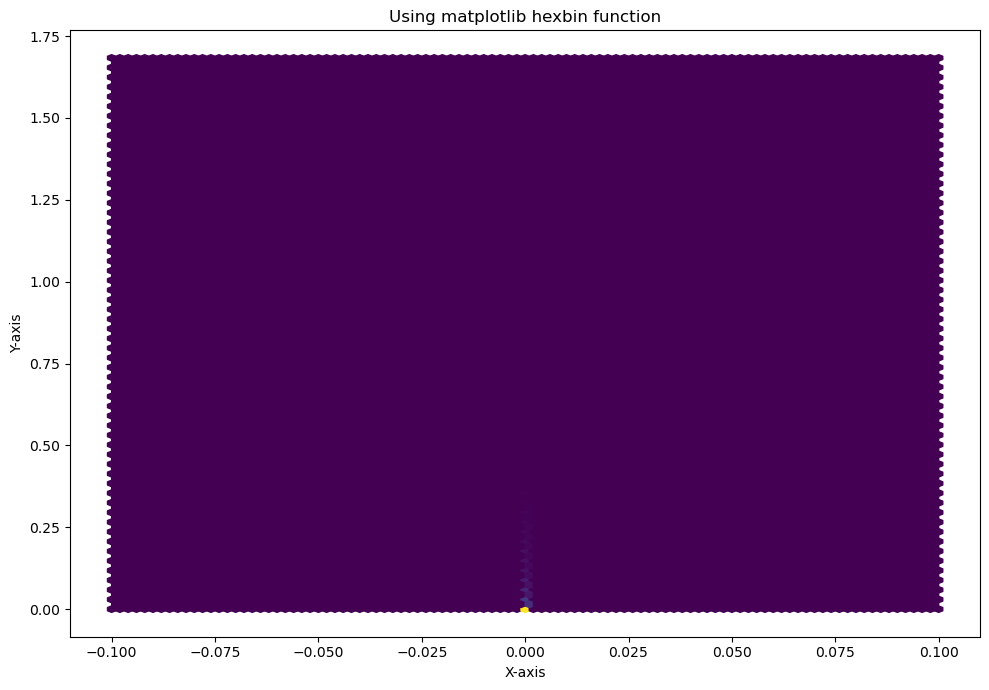

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import random
  
lwp_values_array = lwp_values[:,:].flatten()  # covert 2d to 1d array 
Reff_values = f.variables['Reff'][:]
Reff_values_array = Reff_values[0,149,:,:].flatten()  # covert 2d to 1d array 

# Creating dataset
x =Reff_values_array# np.random.normal(size = 500000)
y = lwp_values_array #x * 3 + 4 * np.random.normal(size = 500000)
  
# Creating bins
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max, 5)
y_bins = np.linspace(y_min, y_max, 2)


fig, ax = plt.subplots(figsize =(10, 7))
# Creating plot
plt.title("Using matplotlib hexbin function")
plt.hexbin(x, y)
  
ax.set_xlabel('X-axis') 
ax.set_ylabel('Y-axis') 
  
# show plot
plt.tight_layout() 
plt.show()

In [60]:
x_min = np.min(lwp_values_array)
x_max = np.max(lwp_values_array)
x_min,x_max

(nan, nan)

In [58]:
# Creating bins
x_min = np.min(lwp_values_array)
x_max = np.max(lwp_values_array)


for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(lwp_values_array, bins = int(x_max-x_min/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
    ax.set_xlabel('Delay (min)', size = 22)
    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

ValueError: cannot convert float NaN to integer

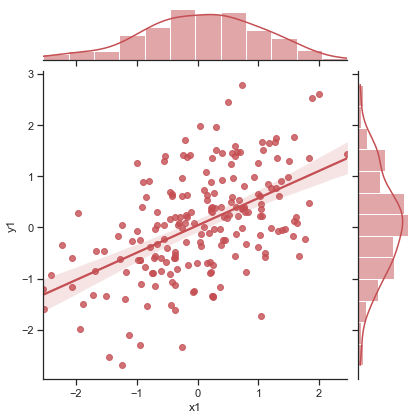

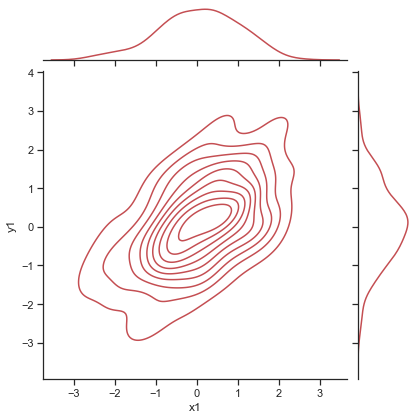

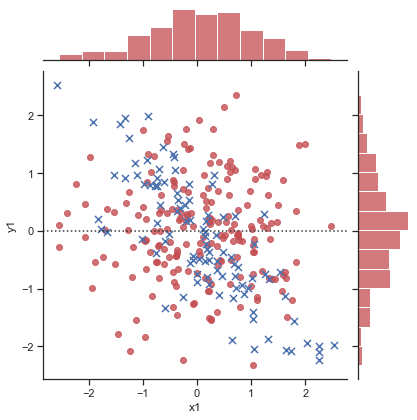

In [77]:
import pandas as pd #https://venkatvlrds.blogspot.com/2018/02/84-jointplot.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# simulate some artificial data
# ========================================
np.random.seed(0)
data1 = np.random.multivariate_normal([0,0], [[1,0.5],[0.5,1]], size=200)
data2 = np.random.multivariate_normal([0,0], [[1,-0.8],[-0.8,1]], size=100)

# both df1 and df2 have bivaraite normals, df1.size=200, df2.size=100
df1 = pd.DataFrame(data1, columns=['x1', 'y1'])
df2 = pd.DataFrame(data2, columns=['x2', 'y2'])


# plot
# ========================================   
#graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r')
graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r',kind="reg") #good
#graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r',kind="hex")
graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r',kind="kde") #good


graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r',kind='resid') #good

graph.x = df2.x2
graph.y = df2.y2
graph.plot_joint(plt.scatter, marker='x', c='b', s=50)

AttributeError: 'JointGrid' object has no attribute 'figure'

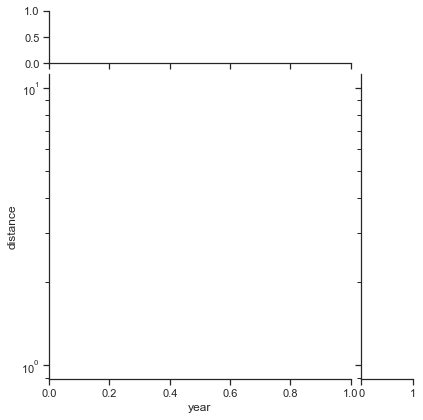

In [70]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

### PDF 

In [66]:
import seaborn as sns
%matplotlib inline


ValueError: If using all scalar values, you must pass an index

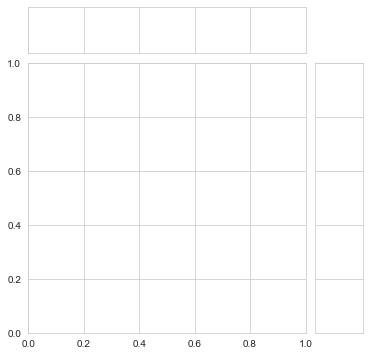

In [68]:
np.random.seed(0)
data1 = np.random.multivariate_normal([0,0], [[1,0.5],[0.5,1]], size=200)
data2 = np.random.multivariate_normal([0,0], [[1,-0.8],[-0.8,1]], size=100)
sns.jointplot(x=data1,y=data2)


In [64]:
# import required libraries #https://stackoverflow.com/questions/31539815/plotting-two-distributions-in-seaborn-jointplot
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
  
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.3 , scale = 1 )
  
#Visualizing the distribution
  
sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.ylabel('Probability Density')

C:\Users\jesse\anaconda3\envs\phd\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(30.625000000000007, 0.5, 'Probability Density')

In [ ]:
MB_matrix = np.zeros((X_train[0,:,:].size,n_bands))
for i in range(n_bands):
    MB_array = X_train[i,:,:].flatten()  # covert 2d to 1d array 
    MB_arrayStd = (MB_array - MB_array.mean())/MB_array.std()  
    MB_matrix[:,i] = MB_arrayStd
print(np.shape(MB_matrix))

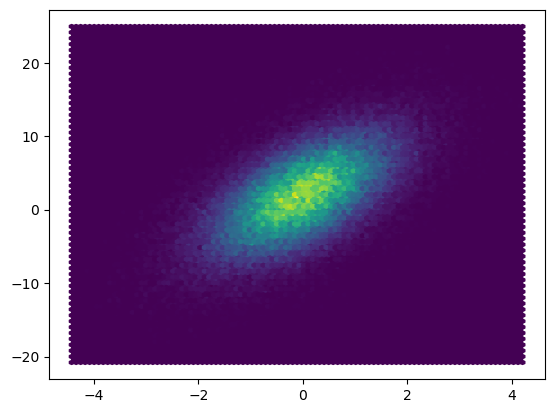

In [58]:
import numpy as np
import matplotlib.pyplot as plt

n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
plt.hexbin(x,y)

plt.show()

In [65]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import random
  
# Creating dataset
n = 100
x =psfc_values
y = qv_values
  
fig = plt.subplots(figsize =(10, 7))
# Creating plot
plt.hist2d(x, y)
plt.title("Simple 2D Histogram")
  
# show plot
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [112]:
mr_lsliq      ##clw

NameError: name 'mr_lsliq' is not defined

# OUTPUT RTTOV

In [8]:
!ncdump -h rttov-msg-v2-odran.nc

netcdf rttov-msg-v2-odran {
dimensions:
	lon = 59 ;
	lat = 91 ;
	chan = 2 ;
variables:
	float lat(lat) ;
	float lon(lon) ;
	float Y(chan, lat, lon) ;
	float Y_clear(chan, lat, lon) ;
	float brdf(chan, lat, lon) ;
	float iwp_ret(lat, lon) ;
	float iwp_model(lat, lon) ;
	float g(lat, lon) ;
}


In [110]:
#rttov_output_file = 'output-data_rttov_T12_Modis.nc' #nan nan
#rttov_output_file = 'output-subtest_rttov_T12.nc' #36 chan 0.78407365 3.0581652e+36
#rttov_output_file = 'output-test-2.nc' #modis data but almost the same high values 0.7964531 903697.1
#rttov_output_file = 'output-test-rttov.nc' #other satellite 2 channels 289.32678 292.90262
#rttov_output_file = 'output-test.nc' #2 channels 156.04689 168.17348 mejor variacion
rttov_output_file = 'rttov-msg-v2-odran.nc' #2 channels 289.32678 292.90262

sds_rttov_output = SD(rttov_output_file, SDC.READ)

datasets_dict = sds_rttov_output.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

0 lat
1 lon
2 Y
3 Y_clear
4 brdf
5 iwp_ret
6 iwp_model
7 g


- Y  TOA reflectances including clouds (no unit) 

- Y_clear TOA clear-sky reflectances (no unit)

In [103]:
TOA_reflectance = sds_rttov_output.select('Y') # select sds
#print(TOA_radiance.info())
#help(TOA_radiance.info)
# first row of the first channel and find its numpy dtype
#data_row = TOA_radiance[0,0,:] # get sds data
print(np.shape (TOA_reflectance))
print(np.min(TOA_reflectance),np.max(TOA_reflectance))

(2, 91, 59)
280.18735 293.56964


In [104]:
TOA_reflectance[0,:,:]


array([[290.17154, 290.5455 , 291.57553, ..., 290.1298 , 290.2285 ,
        289.9404 ],
       [291.34198, 290.5272 , 291.23334, ..., 290.3417 , 289.77783,
        289.7685 ],
       [290.45178, 291.72244, 291.01797, ..., 290.89536, 290.36197,
        289.22495],
       ...,
       [292.0812 , 291.8015 , 291.4313 , ..., 288.78433, 289.58887,
        290.01334],
       [291.44635, 291.749  , 291.4675 , ..., 289.2969 , 287.77515,
        289.1793 ],
       [291.11737, 291.48047, 292.25964, ..., 290.14813, 288.12033,
        288.31573]], dtype=float32)

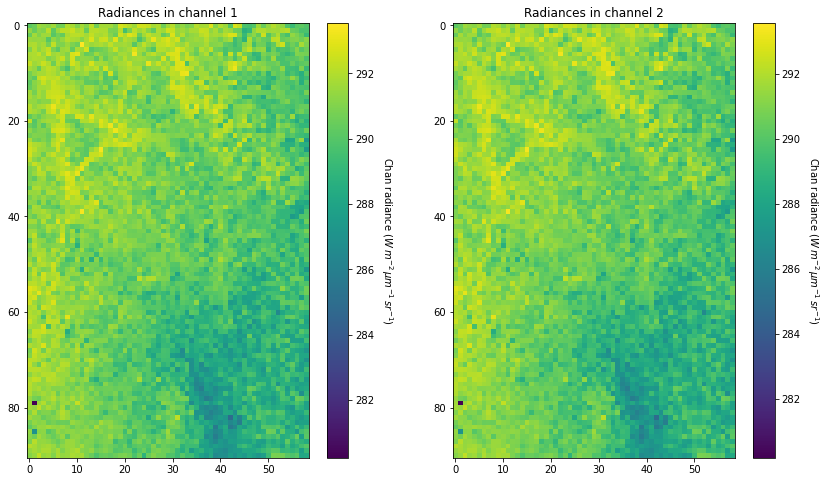

In [105]:
fig,axs = plt.subplots(1,2,figsize = (14,8))

band=0
for col in range(2):
        ax = axs[ col]
        pcm = ax.imshow(TOA_reflectance[band])
        cax=fig.colorbar(pcm, ax=ax)
        out2=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
        out2.set_verticalalignment('bottom')
        out2.set_rotation(270)
        ax.set_title('Radiances in channel %d'% (band+1))

        band=band+1

plt.show()

In [ ]:
https://gis-lab.info/docs/modis_true_color.pdf

In [ ]:
https://cirrus.ucsd.edu/~pierce/software/ncview/quick_intro.html

In [ ]:
http://pysclint.sourceforge.net/pyhdf/pyhdf.SD.html

In [ ]:
continue reading
https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/intro-to-hdf4/
https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/intro-to-climate-data/

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/intro-to-coordinate-reference-systems-python/